## Homework 02: due 22:00, Friday, October 14, 2021

### -	Please work on this Jupyter notebook directly.
### -	Name a folder using your student id and Assignment number (e.g., b88501045-HW2), put all the python scripts and notebook files into the folder and zip the folder (e.g., b88501045-HW2.zip).
### - Submit the homework directly through the NTU COOL course website.


### 0. import essential modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

### 1. Work with data file _Rain_MD-Androy-Bekily_1d_19810101-20211231_CHIRPS.csv_ and perform the following analysis.

##### 1.1 (5%) Import CSV data file _Rain_MD-Androy-Bekily_1d_19810101-20211231_CHIRPS.csv_ and make column 'datetime' datetime format and make it index* of the dataframe 

* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html

In [3]:
# define the location of file
data = './Data/Rain_MD-Androy-Bekily_1d_19810101-20211231_CHIRPS.csv'

# import and read csv file
df_rain_1d = pd.read_csv(data)

# make 'date' as datetime format
df_rain_1d['date'] = pd.to_datetime(df_rain_1d['date'], format='%Y/%m/%d')
print(type(df_rain_1d.iloc[0]['date']))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [4]:
# make date as index of the dataframe
df_rain_1d_set_index = df_rain_1d.set_index('date')
df_rain_1d_set_index.head(5)

,1_9943,1_9944,1_10131,1_10132,1_10133,1_10134,1_10317,1_10318,1_10319,1_10320,...,1_20919,1_20920,1_20921,1_20922,1_20923,1_20924,1_20925,1_20926,1_20927,1_21106
date,,,,,,,,,,,,,,,,,,,,,
1981-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1981-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.235619,1.250143,1.261638,1.268328,1.272727,1.277125,1.280366,1.284529,1.290669,1.656351
1981-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1981-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1981-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


##### 1.2. (5%) Extract non-zero 3-day rainfall data.

In [5]:
# Calculate rainfall totals for 3 days
df_rain_3d = df_rain_1d.resample('3D', on='date').sum() # '3D'= 3 Days

In [6]:
# Extract non-zero 3-day rainfall data
df_rain_3d_non = df_rain_3d[df_rain_3d > 0]
df_rain_3d_non = df_rain_3d_non.reset_index(level=0)
df_rain_3d_non

,date,1_9943,1_9944,1_10131,1_10132,1_10133,1_10134,1_10317,1_10318,1_10319,...,1_20919,1_20920,1_20921,1_20922,1_20923,1_20924,1_20925,1_20926,1_20927,1_21106
0,1981-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.235619,1.250143,1.261638,1.268328,1.272727,1.277125,1.280366,1.284529,1.290669,1.656351
1,1981-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1981-01-07,28.483840,28.196543,28.939207,28.656284,28.368468,28.159972,29.197316,29.300624,29.291067,...,30.045402,30.542404,30.948935,31.222417,31.402328,31.588010,31.730709,32.003136,32.320444,28.423012
3,1981-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.659582,0.723614,0.789371,0.859376,0.867635,0.882081,0.926042,1.082689,1.326361,0.532842
4,1981-01-13,43.036886,42.341474,44.427364,43.730114,43.026596,42.306026,47.305453,46.635144,45.889711,...,72.570076,72.695414,72.702584,72.647177,72.651822,72.681124,72.673059,72.637297,72.593650,71.929089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4987,2021-12-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4988,2021-12-21,1.991874,1.958722,3.121767,3.093238,3.048189,2.994415,4.343554,4.351193,4.347548,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4989,2021-12-24,30.600344,30.182362,30.343969,29.948587,29.515924,29.082394,30.619465,30.413286,30.120138,...,25.834822,25.934289,26.048713,26.079551,26.149138,26.394450,26.982628,27.484875,27.719927,24.812613
4990,2021-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.555963,0.370590,0.184598,0.008094,NaN,NaN,NaN,NaN,NaN,0.988566


#### 1.3. (5% + 10% + 10%) Calculate the quantile values, $q_p (X)$, of 3-day non-zero rainfall data for each location and for each calendar month for $p=0.75$ and $0.95$, and identify the maximum $0.75$ and $0.95$ quantiles, respectively, from all locations and the associated location IDs* for each calendar month. Please export the result to a _CSV_ file named "Rain_MD-Androy-Bekily_3d-NonZero-Max-Quantiles_19810101-20211231.csv"

#### The output CSV file format shall look like the following:

Month,max_q-0.75, id_q-0.75, max_q-0.95, id_q-0.95

January,xx.xx, idddd, yy.yy, iiiidd

Feburary,ss.ss, iiddd, hh.hh, iidddd

..., ..., ..., ..., ...



#### Some useful notes: 
1. To look for the location IDs, the _argmax_ method in _numpy_ module could be useful.  
2. To calculate quantiles from data with 'NaN' values, the _nanquantile_ method in _numpy_ module could be useful.

In [7]:
# Calendar module could be useful here to obtain the texts for months (e.g.'January').
import calendar

# Create 2 dataframe with p=0.75&0.95
df_75 = pd.DataFrame(index=np.arange(12), columns = df_rain_3d_non.columns)
df_95 = pd.DataFrame(index=np.arange(12), columns = df_rain_3d_non.columns)

for i in range(1,13):
    df_rain = df_rain_3d_non[df_rain_3d_non['date'].dt.month == i]
    for k in range(1,len(df_rain_3d_non.columns)):
        data = df_rain.iloc[:,[k]]
        q_75_data = np.nanquantile(data, 0.75)
        q_95_data = np.nanquantile(data, 0.95)
        df_75.iloc[[i-1],[k]] = q_75_data
        df_95.iloc[[i-1],[k]] = q_95_data

df_75['date'] = np.arange(1,13)
df_95['date'] = np.arange(1,13)
df_75

,date,1_9943,1_9944,1_10131,1_10132,1_10133,1_10134,1_10317,1_10318,1_10319,...,1_20919,1_20920,1_20921,1_20922,1_20923,1_20924,1_20925,1_20926,1_20927,1_21106
0,1,26.009346,25.677365,26.240231,25.615042,25.430906,25.198492,27.765521,27.141154,26.96362,...,34.685951,35.016575,34.361905,34.217835,34.200669,34.326453,34.171957,34.45651,34.426414,33.561418
1,2,24.537879,24.857079,24.943628,25.159667,25.28589,25.088828,25.057397,25.220465,25.310335,...,28.719058,28.577179,28.66861,29.025542,28.809249,28.630353,28.73872,28.640242,29.016629,28.630066
2,3,17.155004,17.031721,16.476146,16.65378,16.723284,16.536788,16.378907,16.282496,16.36996,...,21.695639,21.530755,21.409759,21.33035,21.436852,21.134954,20.981364,20.885663,20.726625,22.391325
3,4,8.795143,8.734369,8.857774,8.877225,8.843312,8.425226,8.625176,8.94406,8.794603,...,9.987489,9.797241,9.852345,10.085154,10.081126,10.244214,10.193832,10.253642,10.174983,9.569601
4,5,7.607299,7.513528,7.240904,7.242415,7.292953,7.238899,7.150609,6.996344,7.014595,...,6.000144,6.111581,6.037968,6.056108,6.355197,6.108669,6.304291,6.272529,6.255134,5.959846
5,6,8.246818,8.513281,7.751606,7.761952,7.946885,8.014325,7.233981,7.240928,7.367959,...,5.809529,5.771487,5.686001,5.684894,5.740632,5.743269,5.786907,5.813235,5.855273,5.813235
6,7,5.603162,5.643235,5.139298,5.141555,5.218904,5.162592,4.901499,4.91733,4.932098,...,4.396167,4.428466,4.468574,4.435167,4.36204,4.271483,4.322619,4.320817,4.302236,4.187461
7,8,3.534625,3.592285,3.42471,3.459753,3.453044,3.426346,3.317414,3.295739,3.357891,...,5.252793,5.292003,5.298495,5.315332,5.327166,5.390614,5.539963,5.607881,5.734529,5.237821
8,9,5.448636,5.612786,4.835267,4.886257,4.987183,5.073706,4.561361,4.545206,4.635553,...,3.708349,3.446632,3.460511,3.499449,3.552093,3.558749,3.453334,3.480891,3.592666,3.509969
9,10,12.067274,12.501442,11.74248,11.989473,12.655184,12.51185,12.233637,11.912776,11.608185,...,11.713342,11.341969,11.314713,11.522009,11.273644,11.477535,11.255109,11.429974,11.366757,11.668803


In [8]:
df = pd.DataFrame(index=np.arange(12), columns = np.arange(4)) # create a new dataframe with 12 rows(month) and 4 columns

for i in range(1,13):
    col_75 = df_75.iloc[i-1][1:].astype(float).argmax()+1 # the number of column
    col_95 = df_95.iloc[i-1][1:].astype(float).argmax()+1
    df.iloc[i-1][0] = df_75.iloc[i-1][col_75] # get the value from location
    df.iloc[i-1][1] = df_75.iloc[i-1][1:].astype(float).idxmax()  # location id
    df.iloc[i-1][2] = df_95.iloc[i-1][col_95] 
    df.iloc[i-1][3] = df_95.iloc[i-1][1:].astype(float).idxmax()  

    
# adding column name to the respective columns
df.columns =['max_q-0.75', 'id_q-0.75', 'max_q-0.95', 'id_q-0.95']

In [9]:
df_75['date'] = df_75['date'].apply(lambda x: calendar.month_name[x])
df_75.rename(columns = {'date':'Month'}, inplace = True)
df.set_index(df_75['Month'], inplace = True)
df

,max_q-0.75,id_q-0.75,max_q-0.95,id_q-0.95
Month,,,,
January,38.016853,1_16783,79.964004,1_18467
February,34.729873,1_17913,68.688251,1_17314
March,26.514342,1_16783,54.855291,1_16594
April,12.602045,1_15621,26.715903,1_15630
May,8.943123,1_12981,24.01111,1_13557
June,8.513281,1_9944,14.898632,1_13366
July,5.643235,1_9944,9.567847,1_12411
August,5.924627,1_18464,9.778882,1_20361
September,7.116791,1_15075,18.081243,1_15255


In [10]:
# Export csv file
fn_data_out = './Data/Rain_MD-Androy-Bekily_3d-NonZero-Max-Quantiles_19810101-20211231.csv'
# df.to_csv(fn_data_out, float_format='%.3f') # 小數點至第三位

### 2. Work with _Rain_MD-Androy-Bekily_1M_19810101-20211231_CHIRPS.csv_, and complete the following tasks.

#### 2.1 (5%) Import CSV data file _Rain_MD-Androy-Bekily_1M_19810101-20211231_CHIRPS.csv_ and make column 'datetime' datetime format.

In [11]:
# define the location of file
data = './Data/Rain_MD-Androy-Bekily_1M_19810101-20211231_CHIRPS.csv'

# import and read csv file
df_rain_1m = pd.read_csv(data)

# make 'date' as datetime format
df_rain_1m['date'] = pd.to_datetime(df_rain_1m['date'], format='%Y/%m/%d')
print(type(df_rain_1m.iloc[0]['date']))
df_rain_1m.head()

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


,date,1_9943,1_9944,1_10131,1_10132,1_10133,1_10134,1_10317,1_10318,1_10319,...,1_20919,1_20920,1_20921,1_20922,1_20923,1_20924,1_20925,1_20926,1_20927,1_21106
0,1981-01-01,82.06,80.95,84.23,83.12,82.00,80.98,87.78,87.17,86.35,...,121.83,122.46,122.91,123.22,123.48,123.77,124.00,124.42,124.99,120.07
1,1981-02-01,152.77,153.48,152.22,152.93,153.66,154.88,150.23,151.02,151.85,...,200.76,200.24,199.77,199.53,199.92,200.39,200.85,202.04,203.69,202.14
2,1981-03-01,58.34,58.47,58.37,58.49,58.61,58.83,57.85,58.09,58.32,...,79.52,78.95,78.13,77.28,76.50,75.73,74.99,74.39,73.96,80.33
3,1981-04-01,8.74,8.81,8.65,8.71,8.77,8.86,8.37,8.46,8.56,...,10.07,10.14,10.18,10.21,10.23,10.25,10.26,10.32,10.42,9.64
4,1981-05-01,25.97,25.96,25.59,25.63,25.65,25.65,24.77,24.93,25.09,...,15.05,15.10,15.20,15.31,15.43,15.54,15.66,15.76,15.85,14.84


#### 2.2 (10% + 10%) Assuming that Gamma distribution is a suitable distribution for the monthly rainfall, please fit the November rainfall for location '1_20919' with MLE and MoM methods and output the fitted parameters (using _print_), respectively.

#### Gamma Distribution

---

- $f_x(x)=
\frac{x^{a-1} e^{-x/\beta}}{\beta^{\alpha}\Gamma(\alpha)}$  $x>0$

- $E(X) = \alpha\beta$

- $Var(X) = \alpha{\beta^2}$

In [12]:
from scipy.stats import gamma

# get the November rainfall 
df_rain_1m_Nov = df_rain_1m[df_rain_1m['date'].dt.month == 11]
df_rain_1m_Nov = df_rain_1m_Nov.set_index('date')
df_rain_1m_Nov.head()

# get the location 1_20919
raindata = df_rain_1m_Nov['1_20919']
raindata

date
1981-11-01     61.75
1982-11-01     24.32
1983-11-01     31.79
1984-11-01     38.16
1985-11-01     73.65
1986-11-01    105.28
1987-11-01     55.51
1988-11-01     71.05
1989-11-01     57.10
1990-11-01     39.13
1991-11-01     35.85
1992-11-01     73.24
1993-11-01     18.36
1994-11-01     26.19
1995-11-01     39.33
1996-11-01     32.96
1997-11-01     37.20
1998-11-01     33.02
1999-11-01     27.67
2000-11-01    102.95
2001-11-01     46.28
2002-11-01     49.42
2003-11-01     30.88
2004-11-01     56.93
2005-11-01     55.32
2006-11-01     32.87
2007-11-01     43.00
2008-11-01     50.87
2009-11-01     43.45
2010-11-01     36.29
2011-11-01     28.50
2012-11-01     60.38
2013-11-01     64.93
2014-11-01     19.74
2015-11-01     51.89
2016-11-01     43.34
2017-11-01     43.86
2018-11-01     40.04
2019-11-01     58.40
2020-11-01     22.34
2021-11-01     28.69
Name: 1_20919, dtype: float64

#### MLE method

In [13]:
for s,i in zip(['shape', 'location', 'scale'], [0,1,2]):
    result = gamma.fit(raindata.array, floc = 0.0)
    print(f"The {s} variable is {result[i]:.3f}")

The shape variable is 6.256
The location variable is 0.000
The scale variable is 7.376


#### MoM method 

In [14]:
# get the mean and variance from sample data (raindata)
mean = np.mean(raindata)
var = np.var(raindata)

# calculate the shape(alpha) and scale(beta) 
beta = var/mean
alpha = mean/beta
location = 0

print(f"The shape variable is {alpha:.3f}")
print(f"The location variable is {location:.3f}")
print(f"The scale variable is {beta:.3f}")

The shape variable is 5.597
The location variable is 0.000
The scale variable is 8.244


#### 2.3 (5%) Perform visual inspection on the above fitting result by plotting the histogram (with default number of bins) from the rainfall data and the pdf of fitted Gamma distribution in a single plot. 

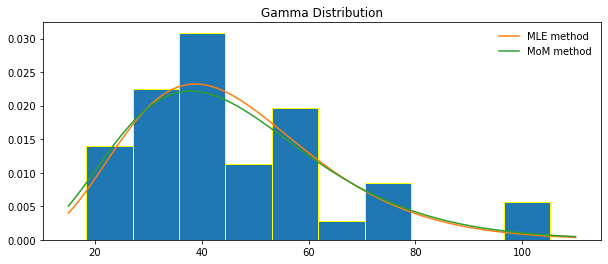

In [15]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111)

# define x and y
x = np.linspace(15, 110, 100)
# PDF of the fitted Gamma distribution
y_MLE = gamma.pdf(x, result[0], result[1], result[2]) # MLE method
y_MoM = gamma.pdf(x, alpha, location, beta) # MoM method

# plot the histogram (default number of bins)
freqs, bins, patches = ax.hist(raindata, density = True, edgecolor='yellow') 
ax.plot(x, y_MLE, label='MLE method')
ax.plot(x, y_MoM, label='MoM method')

plt.title('Gamma Distribution')
plt.legend(frameon = False)
plt.show()

### 3. (35%) The generalised Pareto distribution (GPD) is a 3-parameter continuous distribution. It is famous for it 'fat' tail and is largely used fot extreme risk modelling. 

#### The probability density function (PDF) of GPD is termed:

$f(x) = \frac{1}{\sigma}(1+\kappa z)^{-1(\frac{1}{\kappa}+1)}$

#### And the cumulative density function (CDF) is termed:

$F(x) = 1-(1+\kappa z)^{-\frac{1}{\kappa}}$

#### where $z = \frac{x-\mu}{\sigma}$, and $\mu$, $\sigma$ and $\kappa$ are _location_, _scale_ and _shape_ parameters, respectively.


#### 3.1 (10% + 5%) __Without using Scipy or other similar stats libraries__, please implement two functions named _gpd_rvs_ and _gpd_pdf_. The _gpd_rvs_ function can be used to sample a GPD-distributed random variate, whilst the _gpd_pdf_ function is used to model the pdf of the GPD.

In [16]:
import random as rnd
import math

In [17]:
def gpd_rvs(mu, sigma, k):
    """Return a GPD-distributed random variate"""
    p = rnd.uniform(0, 1)               # F(x)=CDF
    #x = (((1-p)**-k)-1)/k*sigma+mu      # variable x, p only from 0 to 1, so it can't be (p-1)**-k it would be wrong
    x = (math.pow(1-p,-k)-1)/k*sigma+mu
    return x, p

In [18]:
rvs, cdf = gpd_rvs(0, 1, 2)
print(f'A GPD-distributed random variable {rvs:.4f} is sampled with CDF {cdf:.4f} that defined by ourself.')

A GPD-distributed random variable 0.2071 is sampled with CDF 0.1591 that defined by ourself.


In [19]:
# Verify the gpd with scipy.stats
from scipy.stats import genpareto
cdf_verified = genpareto.cdf(rvs, 2, scale=1, loc=0)
print(f'The cdf of random variable {rvs:.4f} is {cdf_verified:.4f} from package.')

The cdf of random variable 0.2071 is 0.1591 from package.


#### The probability density function (PDF) of GPD is termed:

$f(x) = \frac{1}{\sigma}(1+\kappa z)^{-1(\frac{1}{\kappa}+1)}$

In [20]:
def gpd_pdf(x, mu, sigma, k):
    """Return a GPD density function value random variate"""
    z = (x-mu)/sigma
#     pdf = (1/sigma)*math.pow((k*z+1),-1*((1/k)+1))
    pdf = (1/sigma)*(1+k*z)**(-1*(1/k+1))
    
    return pdf

#### 3.2. (5%) Sample 300 GPD-distributed random variates using the _gpd_rvs_ function with the input parameters μ=1.5, σ=0.6 and k=1.05.

In [21]:
GPD_300 = []
for i in range(0,300):
    rvs, cdf = gpd_rvs(1.5, 0.6, 1.05)
    GPD_300.append(rvs)

print(f'The minimum value from 300 randon variates {min(GPD_300)}')
print(f'The maximum value from 300 randon variates {max(GPD_300)}')

The minimum value from 300 randon variates 1.5004965169911826
The maximum value from 300 randon variates 131.47682846823463


#### 3.3 (5% + 5%) Create a histogram plot for these sampled values using a fixed bin width $\nu$, which can be derived with the equation below.

$\nu=3.49sN^{-1/3}$

#### where $N$ is the number of data and $s$ is the sample standard deviation computed from data.

In [22]:
# calculate standard deviation
import statistics
std = statistics.stdev(GPD_300)
print("Standard Deviation of sample is % s "
                % (statistics.stdev(GPD_300)))

Standard Deviation of sample is 12.888564774029978 


In [23]:
bin_width = 3.49*std*(len(GPD_300)**(-1/3))
bin_width

6.719282499590651

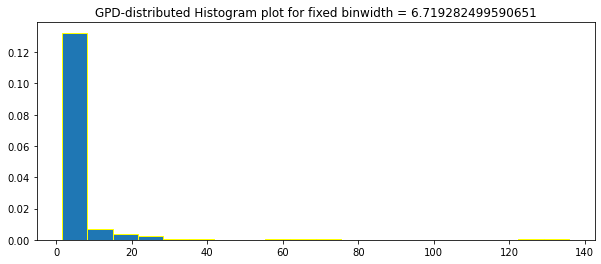

In [24]:
# histogram plot
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111)

# plot the histogram
freqs, bins, patches = ax.hist(GPD_300, density = True, edgecolor='yellow', bins=np.arange(min(GPD_300), max(GPD_300) + bin_width, bin_width))

plt.title(f'GPD-distributed Histogram plot for fixed binwidth = {bin_width}')
plt.show()

#### 3.4. (5%) Perform visual inspection by creating a line plot using the _gpd_pdf_ function with parameters μ=1.5, σ=0.6 and k=1.05, and add this line plot to the above histogram plot.    

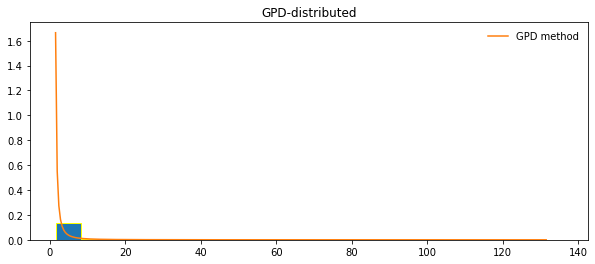

In [25]:
# histogram plot
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111)

# define x and y
x = np.linspace(min(GPD_300), max(GPD_300), 300)
# PDF of the GPD
y = gpd_pdf(x, 1.5, 0.6, 1.05)

# plot the histogram (default number of bins)
freqs, bins, patches = ax.hist(GPD_300, density = True, edgecolor='yellow', bins=np.arange(min(GPD_300), max(GPD_300) + bin_width, bin_width)) 
ax.plot(x, y, label='GPD method')


plt.title('GPD-distributed')
plt.legend(frameon = False)
plt.show()

##### The first value of probability will over 1, i think the reason is that random variate is too close to the mean, so need to drop it when plot the curve. 

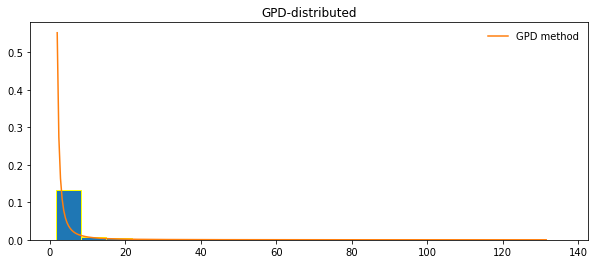

In [26]:
# histogram plot
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111)

# define x and y
x = np.linspace(min(GPD_300), max(GPD_300), 300)
# PDF of the GPD
y = gpd_pdf(x, 1.5, 0.6, 1.05)

# plot the histogram (default number of bins)
freqs, bins, patches = ax.hist(GPD_300, density = True, edgecolor='yellow', bins=np.arange(min(GPD_300), max(GPD_300) + bin_width, bin_width)) 
ax.plot(x[1:], y[1:], label='GPD method')


plt.title('GPD-distributed')
plt.legend(frameon = False)
plt.show()